In [1]:
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np

In [3]:
from sklearn.naive_bayes import GaussianNB

In [4]:
import pandas as pd

In [5]:
from sklearn.metrics import f1_score

In [20]:
import matplotlib.pyplot as plt

In [6]:
df1 = pd.read_csv("/Users/vishnunair/Downloads/ACME-HappinessSurvey2020.csv")

In [7]:
print(df1)

     Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]


In [8]:
Y = df1["Y"]

In [9]:
Y

0      0
1      0
2      1
3      0
4      0
      ..
121    1
122    1
123    1
124    0
125    0
Name: Y, Length: 126, dtype: int64

In [10]:
X = df1[["X1","X2","X3","X4","X5","X6"]]

In [11]:
X

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5
...,...,...,...,...,...,...
121,5,2,3,4,4,3
122,5,2,3,4,2,5
123,5,3,3,4,4,5
124,4,3,3,4,4,5


In [12]:
from sklearn.decomposition import PCA

In [274]:
pca = PCA(n_components=3)

In [275]:
X_np = X.to_numpy()

In [276]:
pca.fit(X_np)

PCA(n_components=3)

In [325]:
print(abs( pca.components_ ))

[[0.32714778 0.2013445  0.49569455 0.30832995 0.65944777 0.27709732]
 [0.11966087 0.92114649 0.14342622 0.04901825 0.26394262 0.21102334]
 [0.30545631 0.30678229 0.64909009 0.4575309  0.41468827 0.09981101]]


In [326]:
pca.explained_variance_ratio_

array([0.3719842 , 0.224524  , 0.12968719])

In [277]:
X_pca = pca.transform(X_np)

In [278]:
print("original shape:   ", X_np.shape)
print("transformed shape:", X_pca.shape)

original shape:    (126, 6)
transformed shape: (126, 3)


In [279]:
X_new = pca.inverse_transform(X_pca)

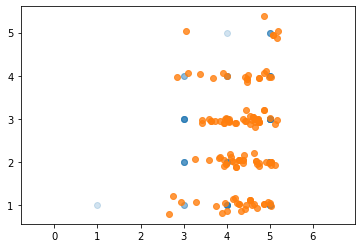

In [280]:
plt.scatter(X_np[:, 0], X_np[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.4, random_state=0)

In [282]:
gnb = GaussianNB()

In [283]:
X_train

array([[3.99189469, 1.94802731, 2.70170194, 3.38439146, 2.97650219,
        4.00993977],
       [5.01584595, 1.99828717, 3.90572578, 4.15001326, 5.02652759,
        4.92112873],
       [3.42570136, 2.98284465, 1.38121587, 2.46821916, 1.64603223,
        3.26202875],
       [4.91489484, 4.10538255, 4.61661004, 4.51117551, 4.80029695,
        4.61621346],
       [3.92829259, 2.03273703, 3.67703766, 4.02996443, 3.02320394,
        4.07309893],
       [3.73347443, 2.95701889, 2.0578552 , 2.90974089, 2.3196999 ,
        3.58199869],
       [4.73987394, 1.98175806, 2.74141859, 3.38570505, 4.32950904,
        4.56957921],
       [3.57759002, 2.03943823, 3.40026684, 3.85656323, 2.34255117,
        3.77457585],
       [4.46458992, 3.93122435, 2.78714543, 3.31879055, 3.68673637,
        4.07381722],
       [4.11092132, 2.02381618, 3.4932493 , 3.90262863, 3.3215684 ,
        4.18782438],
       [4.63725533, 1.03138482, 3.39622813, 3.87568065, 4.33250199,
        4.71985336],
       [4.68660813, 2

In [284]:
y_train

73     0
108    0
89     0
97     1
1      0
      ..
67     0
64     1
117    1
47     0
44     1
Name: Y, Length: 75, dtype: int64

In [285]:
gnb.fit(X_train, y_train)

GaussianNB()

In [286]:
np.shape(X_train)

(75, 6)

In [287]:
np.shape(y_train)

(75,)

In [288]:
y_pred_2 = gnb.predict(X_test)

In [289]:
score_2 = f1_score(y_pred_2, y_test)

In [290]:
print ("GaussianNB F1 score: {: .2f}".format(score_2))

GaussianNB F1 score:  0.65


In [291]:
from sklearn.tree import DecisionTreeClassifier

In [292]:
dtc = DecisionTreeClassifier()

In [293]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [294]:
y_pred = dtc.predict(X_test)

In [295]:
score = f1_score(y_pred, y_test)

In [296]:
print ("Decision Tree F1 score: {:.2f}".format(score))

Decision Tree F1 score: 0.45


In [297]:
from sklearn.svm import SVC

In [298]:
svm = SVC(kernel='sigmoid', C=1000)

In [299]:
svm.fit(X_train, y_train)

SVC(C=1000, kernel='sigmoid')

In [300]:
y_pred = svm.predict(X_test) 

In [301]:
score = f1_score(y_pred, y_test)

In [302]:
print ("SVM F1 score: {:.2f}".format(score))

SVM F1 score: 0.66


In [303]:
#print("Training accuracy is: ", model.score(X_train, y_train))

In [304]:
from sklearn.linear_model import LogisticRegression

In [305]:
logreg = LogisticRegression()

In [306]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [307]:
ypred = logreg.predict(X_test)

In [308]:
score = f1_score(y_pred, y_test)

In [309]:
print ("Logistic Reg F1 score: {:.2f}".format(score))

Logistic Reg F1 score: 0.66


In [310]:
#print("Accuracy of training: ", model.score(X_train, y_train))

In [311]:
from sklearn.neighbors import KNeighborsClassifier

In [312]:
knn = KNeighborsClassifier(n_neighbors=10)

In [313]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [314]:
y_pred = knn.predict(X_test)

In [315]:
score = f1_score(y_pred, y_test)

In [316]:
print ("KNN F1 score: {:.2f}".format(score))

KNN F1 score: 0.60


In [317]:
kernel = ['linear', 'rbf', 'poly', 'sigmoid']

In [318]:
for i in kernel:
    model = SVC(kernel=i, C=1.0)
    model.fit(X_train, y_train)
    print("For kernel:", i)
    print("Accuracy of testing is:", model.score(X_test, y_test))
    print("Accuracy of training is:", model.score(X_train, y_train))

For kernel: linear
Accuracy of testing is: 0.5294117647058824
Accuracy of training is: 0.6266666666666667
For kernel: rbf
Accuracy of testing is: 0.5294117647058824
Accuracy of training is: 0.6266666666666667
For kernel: poly
Accuracy of testing is: 0.49019607843137253
Accuracy of training is: 0.6933333333333334
For kernel: sigmoid
Accuracy of testing is: 0.49019607843137253
Accuracy of training is: 0.5866666666666667


In [319]:
from sklearn.model_selection import GridSearchCV

In [320]:
param_grid = {'C':[0.1, 1, 100, 1000], 'kernel':['rbf', 'poly', 'sigmoid', 'linear'], 'degree':[1,2,3]}

In [321]:
grid = GridSearchCV(SVC(), param_grid)

In [327]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [328]:
print(grid.best_params_)

{'C': 0.1, 'degree': 1, 'kernel': 'rbf'}


In [329]:
print(grid.score(X_test, y_test))

0.49019607843137253


In [330]:
print(grid.score(X_train, y_train))

0.5866666666666667


In [331]:
svm = SVC(kernel='rbf', C=10)

In [332]:
svm.fit(X_train, y_train)

SVC(C=10)

In [333]:
y_pred = svm.predict(X_test)

In [334]:
score = f1_score(y_pred, y_test)

In [335]:
print ("SVM F1 score: {:.2f}".format(score))

SVM F1 score: 0.70
